# Assigment 3


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## Get Data

In [122]:
data_original = pd.read_csv('Pressupostos_dels_ens_municipals_de_Catalunya.csv')


## Preparing Data

In [123]:
data_16 = data_original.loc[data_original.ANY_EXERCICI == '01/01/2016 12:00:00 AM']
data_16.shape

(624092, 11)

In [124]:
data_16_aj = data_16.loc[data_16.NOM_COMPLERT.str.contains('Ajuntament')]
data_16_aj.shape

(434340, 11)

In [125]:
data_16_aj_no0=data_16_aj.loc[data_16_aj.IMPORT > 0.0]

In [126]:
name, counts = np.unique(data_16_aj_no0.NOM_COMPLERT, return_counts = True)
print(np.amax(counts), np.amin(counts), np.mean(counts), np.median(counts))


387 47 201.99092970521542 193.0


In [127]:
np.unique(data_16_aj_no0.TIPUS_PARTIDA)


array(['D', 'I'], dtype=object)

In [128]:
np.unique(data_16_aj_no0.TIPUS_CLASSIF)


array(['E', 'F'], dtype=object)

In [129]:
np.unique(data_16_aj_no0.NIVELL)


array([1, 2, 3, 4], dtype=int64)

## Data Cleaning

In [130]:
data_sorted=data_16_aj_no0[['NOM_COMPLERT','CODI_ENS','TIPUS_PARTIDA','TIPUS_CLASSIF','CODI_PANTALLA', 'NIVELL', 'IMPORT','DESCRIPCIO','ESTRUCTURA']].astype(str)

data_sorted.sort_values(['CODI_ENS','TIPUS_PARTIDA','TIPUS_CLASSIF','CODI_PANTALLA'])
    

,NOM_COMPLERT,CODI_ENS,TIPUS_PARTIDA,TIPUS_CLASSIF,CODI_PANTALLA,NIVELL,IMPORT,DESCRIPCIO,ESTRUCTURA
4011,Ajuntament d'Agullana,1700100000,D,E,1.0,1,287505.72,Despeses de personal,1
4012,Ajuntament d'Agullana,1700100000,D,E,10.0,2,17505.72,Òrgans de govern i personal directiu,10
4013,Ajuntament d'Agullana,1700100000,D,E,100.0,3,17505.72,Retr. bàs. i altres rem. membres òrgans de govern,1000
4014,Ajuntament d'Agullana,1700100000,D,E,100.0,4,17505.72,Retribucions bàsiques,100000
4015,Ajuntament d'Agullana,1700100000,D,E,12.0,2,38000.0,Personal funcionari,12
4016,Ajuntament d'Agullana,1700100000,D,E,120.0,3,12000.0,Retribucions bàsiques,1200
4017,Ajuntament d'Agullana,1700100000,D,E,120.0,4,12000.0,Sous del grup A1,120000
4018,Ajuntament d'Agullana,1700100000,D,E,121.0,3,26000.0,Retribucions complementàries,1201
4019,Ajuntament d'Agullana,1700100000,D,E,121.0,4,26000.0,Complement de destinació,120100
4020,Ajuntament d'Agullana,1700100000,D,E,13.0,2,165000.0,Personal laboral,13


# Data Investigation

## Número ajuntaments

In [131]:
nom=np.unique(data_16_aj_no0.NOM_COMPLERT)
print('Número ajuntaments',len(nom))

Número ajuntaments 882


###### Will you need to transform data in a some way in order to be able to compare different budgets? 
SÍ
##### How?
* Veure ingressos i despeses de cada ajuntament
* Veure la gestió de pressupost de cada ajuntament
* Veure ajuntaments amb beneficis i deutes
- Veure número de descripcions per cada ajuntament

## Ingressos i despeses de cada ajuntament

In [132]:
def get_import_ajuntament(data, codi_ens, tipus):
    r= np.unique(data.loc[(data.CODI_ENS == codi_ens) & (data.TIPUS_PARTIDA == tipus) & (data.NIVELL == '1') , ['IMPORT']].IMPORT)
    suma=0
    for price in r:
            suma=suma+(float(price))
          
    return suma

def get_ingressos_despesa_per_ajuntament(data):
    codi_ens = np.unique(data.CODI_ENS)
    nom = np.unique(data.NOM_COMPLERT)



    data_comparative = pd.DataFrame(columns=['NOM_COMPLERT','CODI_ENS', 'DESPESES','INGRESSOS'])
    
    i = 0
    for ens in codi_ens:
        despesses = get_import_ajuntament(data, ens, 'D')
        ingressos = get_import_ajuntament(data, ens, 'I')
        data_comparative.loc[i] = [nom[i], ens, despesses,ingressos]
        print(data_comparative.loc[i])
        i = i +1
        
    return data_comparative


ingres_despesa_total = get_ingressos_despesa_per_ajuntament(data_sorted)

NOM_COMPLERT    Ajuntament d'Abrera
CODI_ENS                 1700100000
DESPESES                 2.1276e+06
INGRESSOS                1.0638e+06
Name: 0, dtype: object
NOM_COMPLERT    Ajuntament d'Agramunt
CODI_ENS                   1700250006
DESPESES                  1.97735e+06
INGRESSOS                  1.3316e+06
Name: 1, dtype: object
NOM_COMPLERT    Ajuntament d'Aguilar de Segarra
CODI_ENS                             1700310007
DESPESES                                 567860
INGRESSOS                                285080
Name: 2, dtype: object
NOM_COMPLERT    Ajuntament d'Agullana
CODI_ENS                   1700460009
DESPESES                    1.326e+06
INGRESSOS                      663000
Name: 3, dtype: object
NOM_COMPLERT    Ajuntament d'Aiguafreda
CODI_ENS                     1700590004
DESPESES                    1.29892e+06
INGRESSOS                        655710
Name: 4, dtype: object
NOM_COMPLERT    Ajuntament d'Aiguamúrcia
CODI_ENS                      1700620002
DES

NOM_COMPLERT    Ajuntament d'Artesa de Lleida
CODI_ENS                           1705190004
DESPESES                               565486
INGRESSOS                              282743
Name: 48, dtype: object
NOM_COMPLERT    Ajuntament d'Artesa de Segre
CODI_ENS                          1705240003
DESPESES                              464200
INGRESSOS                             232100
Name: 49, dtype: object
NOM_COMPLERT    Ajuntament d'Artés
CODI_ENS                1705450006
DESPESES               1.76161e+06
INGRESSOS                   880807
Name: 50, dtype: object
NOM_COMPLERT    Ajuntament d'Ascó
CODI_ENS               1705580001
DESPESES                   997400
INGRESSOS                  498700
Name: 51, dtype: object
NOM_COMPLERT    Ajuntament d'Aspa
CODI_ENS               1705610007
DESPESES              4.18725e+06
INGRESSOS             2.09362e+06
Name: 52, dtype: object
NOM_COMPLERT    Ajuntament d'Avinyonet de Puigventós
CODI_ENS                                  170577000

NOM_COMPLERT    Ajuntament d'Ossó de Sió
CODI_ENS                      1710770005
DESPESES                     1.03452e+06
INGRESSOS                         517260
Name: 93, dtype: object
NOM_COMPLERT    Ajuntament d'Ullastret
CODI_ENS                    1710960009
DESPESES                   2.27877e+06
INGRESSOS                  1.13939e+06
Name: 94, dtype: object
NOM_COMPLERT    Ajuntament d'Ulldecona
CODI_ENS                    1711000000
DESPESES                   3.11073e+06
INGRESSOS                  1.55537e+06
Name: 95, dtype: object
NOM_COMPLERT    Ajuntament d'Ulldemolins
CODI_ENS                      1711170005
DESPESES                     2.20503e+06
INGRESSOS                    1.10252e+06
Name: 96, dtype: object
NOM_COMPLERT    Ajuntament d'Ullà
CODI_ENS               1711220002
DESPESES                   730000
INGRESSOS                  365000
Name: 97, dtype: object
NOM_COMPLERT    Ajuntament d'Ultramort
CODI_ENS                    1711430008
DESPESES                  

NOM_COMPLERT    Ajuntament de Biure
CODI_ENS                 1715950006
DESPESES                 2.9734e+06
INGRESSOS                1.4867e+06
Name: 138, dtype: object
NOM_COMPLERT    Ajuntament de Blancafort
CODI_ENS                      1716090004
DESPESES                     5.35498e+07
INGRESSOS                    2.67749e+07
Name: 139, dtype: object
NOM_COMPLERT    Ajuntament de Blanes
CODI_ENS                  1716160009
DESPESES                   2.482e+06
INGRESSOS                  1.241e+06
Name: 140, dtype: object
NOM_COMPLERT    Ajuntament de Boadella i les Escaules
CODI_ENS                                   1716210007
DESPESES                                       505670
INGRESSOS                                      252835
Name: 141, dtype: object
NOM_COMPLERT    Ajuntament de Bolvir
CODI_ENS                  1716370005
DESPESES                  7.4137e+06
INGRESSOS                3.70685e+06
Name: 142, dtype: object
NOM_COMPLERT    Ajuntament de Bonastre
CODI_ENS        

NOM_COMPLERT    Ajuntament de Canovelles
CODI_ENS                      1720760009
DESPESES                     6.86479e+06
INGRESSOS                     3.4324e+06
Name: 184, dtype: object
NOM_COMPLERT    Ajuntament de Cantallops
CODI_ENS                      1720820002
DESPESES                     2.47424e+06
INGRESSOS                    1.23712e+06
Name: 185, dtype: object
NOM_COMPLERT    Ajuntament de Capafonts
CODI_ENS                     1720950006
DESPESES                    2.51994e+06
INGRESSOS                   1.25997e+06
Name: 186, dtype: object
NOM_COMPLERT    Ajuntament de Capellades
CODI_ENS                      1721090004
DESPESES                     1.85158e+06
INGRESSOS                         925789
Name: 187, dtype: object
NOM_COMPLERT    Ajuntament de Capmany
CODI_ENS                   1721160009
DESPESES                   2.0312e+06
INGRESSOS                  1.0156e+06
Name: 188, dtype: object
NOM_COMPLERT    Ajuntament de Capolat
CODI_ENS                   172121

NOM_COMPLERT    Ajuntament de Cercs
CODI_ENS                 2501690004
DESPESES                4.60981e+06
INGRESSOS               2.30491e+06
Name: 224, dtype: object
NOM_COMPLERT    Ajuntament de Cerdanyola del Vallès
CODI_ENS                                 2501940003
DESPESES                                9.42272e+06
INGRESSOS                               4.71136e+06
Name: 225, dtype: object
NOM_COMPLERT    Ajuntament de Cervelló
CODI_ENS                    2502080001
DESPESES                   1.09085e+06
INGRESSOS                       801523
Name: 226, dtype: object
NOM_COMPLERT    Ajuntament de Cervera
CODI_ENS                   2502150006
DESPESES                  5.13011e+06
INGRESSOS                 2.56505e+06
Name: 227, dtype: object
NOM_COMPLERT    Ajuntament de Cervià de Ter
CODI_ENS                         2502200000
DESPESES                             536194
INGRESSOS                            269097
Name: 228, dtype: object
NOM_COMPLERT    Ajuntament de Cervià de

NOM_COMPLERT    Ajuntament de Fogars de Montclús
CODI_ENS                              2507070005
DESPESES                              1.7018e+06
INGRESSOS                                 850900
Name: 267, dtype: object
NOM_COMPLERT    Ajuntament de Fogars de la Selva
CODI_ENS                              2507290004
DESPESES                             2.04444e+07
INGRESSOS                            1.02222e+07
Name: 268, dtype: object
NOM_COMPLERT    Ajuntament de Folgueroles
CODI_ENS                       2507350006
DESPESES                       1.1872e+06
INGRESSOS                          603100
Name: 269, dtype: object
NOM_COMPLERT    Ajuntament de Fondarella
CODI_ENS                      2507400000
DESPESES                          600851
INGRESSOS                         300426
Name: 270, dtype: object
NOM_COMPLERT    Ajuntament de Fonollosa
CODI_ENS                     2507530008
DESPESES                         327495
INGRESSOS                        163848
Name: 271, dtype

NOM_COMPLERT    Ajuntament de Guissona
CODI_ENS                    2513050006
DESPESES                   1.97506e+06
INGRESSOS                       987531
Name: 311, dtype: object
NOM_COMPLERT    Ajuntament de Guixers
CODI_ENS                   2513120002
DESPESES                   1.0544e+06
INGRESSOS                      566285
Name: 312, dtype: object
NOM_COMPLERT    Ajuntament de Gurb
CODI_ENS                2513270005
DESPESES                    575325
INGRESSOS                   287663
Name: 313, dtype: object
NOM_COMPLERT    Ajuntament de Gósol
CODI_ENS                 2513330008
DESPESES                1.91925e+06
INGRESSOS                    959626
Name: 314, dtype: object
NOM_COMPLERT    Ajuntament de Jafre
CODI_ENS                 2513480001
DESPESES                1.38486e+06
INGRESSOS                    692431
Name: 315, dtype: object
NOM_COMPLERT    Ajuntament de Jorba
CODI_ENS                 2513510007
DESPESES                2.36865e+06
INGRESSOS               1.18432

NOM_COMPLERT    Ajuntament de Maspujols
CODI_ENS                     2518260009
DESPESES                    1.90437e+06
INGRESSOS                        952184
Name: 357, dtype: object
NOM_COMPLERT    Ajuntament de Masquefa
CODI_ENS                    2518320002
DESPESES                   2.35026e+06
INGRESSOS                  1.17413e+06
Name: 358, dtype: object
NOM_COMPLERT    Ajuntament de Massalcoreig
CODI_ENS                        2518500000
DESPESES                           1.4e+06
INGRESSOS                           700000
Name: 359, dtype: object
NOM_COMPLERT    Ajuntament de Massoteres
CODI_ENS                      2518630008
DESPESES                          362036
INGRESSOS                         181018
Name: 360, dtype: object
NOM_COMPLERT    Ajuntament de Matadepera
CODI_ENS                      2518980001
DESPESES                     4.64324e+06
INGRESSOS                    2.32162e+06
Name: 361, dtype: object
NOM_COMPLERT    Ajuntament de Mataró
CODI_ENS              

NOM_COMPLERT    Ajuntament de Móra d'Ebre
CODI_ENS                       2523980001
DESPESES                      1.36137e+06
INGRESSOS                          680686
Name: 400, dtype: object
NOM_COMPLERT    Ajuntament de Móra la Nova
CODI_ENS                        2524020002
DESPESES                        2.8802e+06
INGRESSOS                       1.4476e+06
Name: 401, dtype: object
NOM_COMPLERT    Ajuntament de Nalec
CODI_ENS                 2524240003
DESPESES                1.39786e+06
INGRESSOS                    698930
Name: 402, dtype: object
NOM_COMPLERT    Ajuntament de Naut Aran
CODI_ENS                     2524300000
DESPESES                    9.95606e+06
INGRESSOS                   4.97803e+06
Name: 403, dtype: object
NOM_COMPLERT    Ajuntament de Navarcles
CODI_ENS                     2524450006
DESPESES                    1.35544e+06
INGRESSOS                        677721
Name: 404, dtype: object
NOM_COMPLERT    Ajuntament de Navata
CODI_ENS                  25245800

NOM_COMPLERT    Ajuntament de Porqueres
CODI_ENS                     4302130008
DESPESES                    2.48319e+06
INGRESSOS                   1.24159e+06
Name: 445, dtype: object
NOM_COMPLERT    Ajuntament de Porrera
CODI_ENS                   4302280001
DESPESES                  2.86012e+06
INGRESSOS                 1.43006e+06
Name: 446, dtype: object
NOM_COMPLERT    Ajuntament de Portbou
CODI_ENS                   4302340003
DESPESES                       995633
INGRESSOS                      497817
Name: 447, dtype: object
NOM_COMPLERT    Ajuntament de Pradell de la Teixeta
CODI_ENS                                 4302490004
DESPESES                                 4.6908e+06
INGRESSOS                               2.35331e+06
Name: 448, dtype: object
NOM_COMPLERT    Ajuntament de Prades
CODI_ENS                  4302520002
DESPESES                 1.67889e+06
INGRESSOS                     839447
Name: 449, dtype: object
NOM_COMPLERT    Ajuntament de Prat de Comte
CODI_ENS   

NOM_COMPLERT    Ajuntament de Riudellots de la Selva
CODI_ENS                                  4306720002
DESPESES                                   1.505e+06
INGRESSOS                                     836126
Name: 489, dtype: object
NOM_COMPLERT    Ajuntament de Riudoms
CODI_ENS                   4306880001
DESPESES                  1.89682e+06
INGRESSOS                      948411
Name: 490, dtype: object
NOM_COMPLERT    Ajuntament de Riumors
CODI_ENS                   4306910007
DESPESES                       670366
INGRESSOS                      349178
Name: 491, dtype: object
NOM_COMPLERT    Ajuntament de Rocafort de Queralt
CODI_ENS                               4307120002
DESPESES                               3.6518e+06
INGRESSOS                              1.8364e+06
Name: 492, dtype: object
NOM_COMPLERT    Ajuntament de Roda de Berà
CODI_ENS                        4307270005
DESPESES                            713924
INGRESSOS                           356962
Name: 493, d

NOM_COMPLERT    Ajuntament de Sant Esteve Sesrovires
CODI_ENS                                  4310800000
DESPESES                                   4.042e+06
INGRESSOS                                  2.021e+06
Name: 529, dtype: object
NOM_COMPLERT    Ajuntament de Sant Esteve de Palautordera
CODI_ENS                                       4310930008
DESPESES                                        2.375e+07
INGRESSOS                                      1.1875e+07
Name: 530, dtype: object
NOM_COMPLERT    Ajuntament de Sant Esteve de la Sarga
CODI_ENS                                   4311070005
DESPESES                                       788694
INGRESSOS                                      394347
Name: 531, dtype: object
NOM_COMPLERT    Ajuntament de Sant Feliu de Buixalleu
CODI_ENS                                   4311290004
DESPESES                                       777859
INGRESSOS                                      417141
Name: 532, dtype: object
NOM_COMPLERT    Ajuntame

NOM_COMPLERT    Ajuntament de Sant Martí Sesgueioles
CODI_ENS                                  4314950006
DESPESES                                 1.43536e+06
INGRESSOS                                     784355
Name: 565, dtype: object
NOM_COMPLERT    Ajuntament de Sant Martí Vell
CODI_ENS                           4315080001
DESPESES                          6.08316e+06
INGRESSOS                         3.04158e+06
Name: 566, dtype: object
NOM_COMPLERT    Ajuntament de Sant Martí d'Albars
CODI_ENS                               4315150006
DESPESES                                   734470
INGRESSOS                                  367235
Name: 567, dtype: object
NOM_COMPLERT    Ajuntament de Sant Martí de Centelles
CODI_ENS                                   4315200000
DESPESES                                   2.1906e+06
INGRESSOS                                 1.10487e+06
Name: 568, dtype: object
NOM_COMPLERT    Ajuntament de Sant Martí de Llémena
CODI_ENS                            

NOM_COMPLERT    Ajuntament de Santa Llogaia d'Àlguema
CODI_ENS                                    800390004
DESPESES                                  2.65159e+07
INGRESSOS                                  1.3258e+07
Name: 602, dtype: object
NOM_COMPLERT    Ajuntament de Santa Margarida de Montbui
CODI_ENS                                       800440003
DESPESES                                     1.17764e+06
INGRESSOS                                         588818
Name: 603, dtype: object
NOM_COMPLERT    Ajuntament de Santa Margarida i els Monjos
CODI_ENS                                         800570005
DESPESES                                       1.96906e+07
INGRESSOS                                        9.995e+06
Name: 604, dtype: object
NOM_COMPLERT    Ajuntament de Santa Maria d'Oló
CODI_ENS                              800600000
DESPESES                            3.39804e+07
INGRESSOS                           1.69902e+07
Name: 605, dtype: object
NOM_COMPLERT    Ajuntament d

NOM_COMPLERT    Ajuntament de Talavera
CODI_ENS                     805690004
DESPESES                   1.24142e+08
INGRESSOS                  6.20711e+07
Name: 645, dtype: object
NOM_COMPLERT    Ajuntament de Taradell
CODI_ENS                     805750006
DESPESES                        230341
INGRESSOS                       115170
Name: 646, dtype: object
NOM_COMPLERT    Ajuntament de Tarragona
CODI_ENS                      805810007
DESPESES                    5.27384e+06
INGRESSOS                   2.58692e+06
Name: 647, dtype: object
NOM_COMPLERT    Ajuntament de Tarroja de Segarra
CODI_ENS                               805940003
DESPESES                                  725600
INGRESSOS                                 377800
Name: 648, dtype: object
NOM_COMPLERT    Ajuntament de Tarrés
CODI_ENS                   806080001
DESPESES                      475348
INGRESSOS                     237674
Name: 649, dtype: object
NOM_COMPLERT    Ajuntament de Tavertet
CODI_ENS            

NOM_COMPLERT    Ajuntament de Vallfogona de Balaguer
CODI_ENS                                   810380001
DESPESES                                 1.64239e+06
INGRESSOS                                     821195
Name: 691, dtype: object
NOM_COMPLERT    Ajuntament de Vallfogona de Ripollès
CODI_ENS                                   810430008
DESPESES                                 1.98263e+06
INGRESSOS                                     991315
Name: 692, dtype: object
NOM_COMPLERT    Ajuntament de Vallfogona de Riucorb
CODI_ENS                                  810560009
DESPESES                                2.04895e+07
INGRESSOS                               1.02448e+07
Name: 693, dtype: object
NOM_COMPLERT    Ajuntament de Vallirana
CODI_ENS                      810690004
DESPESES                     2.3924e+07
INGRESSOS                    1.1962e+07
Name: 694, dtype: object
NOM_COMPLERT    Ajuntament de Vallmoll
CODI_ENS                     810750006
DESPESES                      

NOM_COMPLERT    Ajuntament de Vilanova d'Escornalbou
CODI_ENS                                   814770005
DESPESES                                 3.96702e+07
INGRESSOS                                1.98351e+07
Name: 734, dtype: object
NOM_COMPLERT    Ajuntament de Vilanova de Bellpuig
CODI_ENS                                 814830008
DESPESES                               9.69672e+06
INGRESSOS                              5.11582e+06
Name: 735, dtype: object
NOM_COMPLERT    Ajuntament de Vilanova de Meià
CODI_ENS                             814960009
DESPESES                           2.75198e+06
INGRESSOS                          1.37599e+06
Name: 736, dtype: object
NOM_COMPLERT    Ajuntament de Vilanova de Prades
CODI_ENS                               815090004
DESPESES                             1.03778e+06
INGRESSOS                                 518892
Name: 737, dtype: object
NOM_COMPLERT    Ajuntament de Vilanova de Sau
CODI_ENS                            815370005
DESPESES

NOM_COMPLERT    Ajuntament de la Baronia de Rialb
CODI_ENS                                819440003
DESPESES                              7.58223e+07
INGRESSOS                             3.86611e+07
Name: 775, dtype: object
NOM_COMPLERT    Ajuntament de la Bisbal d'Empordà
CODI_ENS                                819570005
DESPESES                              1.05224e+06
INGRESSOS                                  526119
Name: 776, dtype: object
NOM_COMPLERT    Ajuntament de la Bisbal de Falset
CODI_ENS                                819600000
DESPESES                              4.16896e+07
INGRESSOS                             2.08448e+07
Name: 777, dtype: object
NOM_COMPLERT    Ajuntament de la Bisbal del Penedès
CODI_ENS                                  819760009
DESPESES                                  2.564e+07
INGRESSOS                                 1.282e+07
Name: 778, dtype: object
NOM_COMPLERT    Ajuntament de la Canonja
CODI_ENS                       819820002
DESPESES  

NOM_COMPLERT    Ajuntament de la Seu d'Urgell
CODI_ENS                            823780001
DESPESES                          4.53236e+06
INGRESSOS                         2.26618e+06
Name: 816, dtype: object
NOM_COMPLERT    Ajuntament de la Sénia
CODI_ENS                     823840003
DESPESES                   3.83526e+07
INGRESSOS                  1.91763e+07
Name: 817, dtype: object
NOM_COMPLERT    Ajuntament de la Tallada d'Empordà
CODI_ENS                                 824390004
DESPESES                                    326604
INGRESSOS                                   163302
Name: 818, dtype: object
NOM_COMPLERT    Ajuntament de la Torre de Cabdella
CODI_ENS                                 824440003
DESPESES                               1.35254e+07
INGRESSOS                              6.76268e+06
Name: 819, dtype: object
NOM_COMPLERT    Ajuntament de la Torre de Claramunt
CODI_ENS                                  824570005
DESPESES                                1.85338e

NOM_COMPLERT    Ajuntament del Perelló
CODI_ENS                     828450006
DESPESES                   3.48315e+07
INGRESSOS                  1.74158e+07
Name: 857, dtype: object
NOM_COMPLERT    Ajuntament del Pinell de Brai
CODI_ENS                            828580001
DESPESES                           3.0945e+07
INGRESSOS                         1.54725e+07
Name: 858, dtype: object
NOM_COMPLERT    Ajuntament del Pla de Santa Maria
CODI_ENS                                828610007
DESPESES                              6.75219e+06
INGRESSOS                              3.3761e+06
Name: 859, dtype: object
NOM_COMPLERT    Ajuntament del Pla del Penedès
CODI_ENS                             828960009
DESPESES                           1.21664e+07
INGRESSOS                           6.0832e+06
Name: 860, dtype: object
NOM_COMPLERT    Ajuntament del Poal
CODI_ENS                  829170005
DESPESES                 1.5289e+07
INGRESSOS               7.64452e+06
Name: 861, dtype: object
NOM

In [133]:
ingres_despesa_total.sort_values(['DESPESES'])


,NOM_COMPLERT,CODI_ENS,DESPESES,INGRESSOS
246,Ajuntament de Cornellà de Llobregat,2504500000,1.510780e+05,2.621616e+05
760,Ajuntament de l'Albiol,817700000,1.961840e+05,9.809200e+04
263,Ajuntament de Figueres,2506420002,2.079961e+05,1.044481e+05
234,Ajuntament de Coll de Nargó,2503130008,2.086331e+05,1.048415e+05
681,Ajuntament de Tàrrega,809300000,2.100000e+05,1.050000e+05
669,Ajuntament de Torrelles de Llobregat,808040003,2.101000e+05,1.385500e+05
646,Ajuntament de Taradell,805750006,2.303407e+05,1.151703e+05
136,Ajuntament de Bigues i Riells,1715760009,2.469396e+05,1.234698e+05
134,Ajuntament de Bescanó,1715440003,2.609800e+05,1.304900e+05
310,Ajuntament de Guimerà,2512910007,2.648267e+05,1.324133e+05


## Gestió de pressupostos de cada ajuntament

In [134]:
def get_presupostos(data):
    codi_ens = np.unique(data.CODI_ENS)
    nom = np.unique(data.NOM_COMPLERT)
    data_comparative = pd.DataFrame(columns=['NOM_COMPLERT','CODI_ENS', 'PRESSUPOST'])
    
    i = 0
    for ens in codi_ens:
      
        despesses = get_import_ajuntament(data, ens, 'D')
        ingressos = get_import_ajuntament(data, ens, 'I')
        data_comparative.loc[i] = [nom[i], ens,(ingressos-despesses)]

        i = i +1
        
    return data_comparative


presupostos = get_presupostos(data_sorted)


        

## Ajuntaments amb beneficis i deutes

### Ajuntaments amb beneficis

In [135]:
benefici=presupostos.loc[presupostos.PRESSUPOST >= 0.0]
benefici.head(100)

,NOM_COMPLERT,CODI_ENS,PRESSUPOST
246,Ajuntament de Cornellà de Llobregat,2504500000,111083.57


### Número ajuntaments amb deutes

In [136]:
deute=presupostos.loc[presupostos.PRESSUPOST <= 0.0]
len(deute)

881

## Numero d'ajuntaments per descripcio en nivell 2

Aquesta investigació es realitza per poder observar després un cluster amb més claretat

In [137]:
def get_num_ajuntaments_by_desc(data, descripcio):
    r= np.unique(data.loc[(data.DESCRIPCIO == descripcio) & (data.NIVELL == '2') , ['NOM_COMPLERT']].NOM_COMPLERT)
    return len(r)

nivells= np.unique(data_sorted.NIVELL)

descriptions_bylevel2 = pd.DataFrame(columns=['DESCRIPCIO','NUM_AJUNTAMENTS'])

i=0
for nivell in nivells:
    if nivell=='2':
        descriptions = data_sorted.loc[data_sorted["NIVELL"] == nivell]
        lvl2_descriptions = np.unique(descriptions.DESCRIPCIO)
        for descripcio in lvl2_descriptions:
            num_ajuntaments= get_num_ajuntaments_by_desc(data_sorted, descripcio)
            descriptions_bylevel2.loc[i] = [descripcio,num_ajuntaments]
            i=i+1
descriptions_bylevel2=descriptions_bylevel2.sort_values(['NUM_AJUNTAMENTS'])
descriptions_bylevel2.tail(5)

,DESCRIPCIO,NUM_AJUNTAMENTS
66,Impost sobre activitats econòmiques,880
103,"Reparacions, manteniment i conservació",881
39,De comunitats autònomes,881
106,Serveis de caràcter general,882
87,"Material, subministraments i d'altres",882


## Import de les dos descripcions que apareixen en més ajuntaments

In [138]:
from random import randint

def get_import_ajuntament_descripcio(data, codi_ens, descripcio):
    r= np.unique(data.loc[(data.CODI_ENS == codi_ens)  & (data.DESCRIPCIO == descripcio) , ['IMPORT']].IMPORT)
    suma=0
    for price in r:
            suma=suma+(float(price))
          
    return suma

def get_ingres_despesa_per_ajuntament(data):
    codi_ens = np.unique(data.CODI_ENS)
    nom = np.unique(data.NOM_COMPLERT)



    data_comparative = pd.DataFrame(columns=['NOM_COMPLERT','CODI_ENS', 'MATERIAL','SERVEIS'])
  
    i = 0

    for ens in codi_ens:
        material = get_import_ajuntament_descripcio(data, ens, "Material, subministraments i d'altres")
        serveis = get_import_ajuntament_descripcio(data, ens, 'Serveis de caràcter general')
      
        data_comparative.loc[i] = [nom[i], ens, material, serveis]
        i = i +1
   
        
        
    return data_comparative


material_serveis = get_ingres_despesa_per_ajuntament(data_sorted)


        

In [139]:
material_serveis.sort_values(['MATERIAL'])

,NOM_COMPLERT,CODI_ENS,MATERIAL,SERVEIS
770,Ajuntament de l'Espluga de Francolí,818783020,5.000000e+01,1.391200e+06
760,Ajuntament de l'Albiol,817700000,2.117165e+04,3.777165e+04
681,Ajuntament de Tàrrega,809300000,2.280000e+04,4.040000e+04
669,Ajuntament de Torrelles de Llobregat,808040003,2.330000e+04,4.095000e+04
514,Ajuntament de Sant Andreu Salou,4309393018,2.798599e+04,1.313110e+03
280,Ajuntament de Forès,2508700000,2.896800e+04,3.737301e+04
246,Ajuntament de Cornellà de Llobregat,2504500000,2.903900e+04,5.638900e+04
317,Ajuntament de Josa i Tuixén,2513640003,3.041784e+04,3.704916e+04
327,Ajuntament de Llambilles,2514840003,3.121957e+04,6.498957e+04
234,Ajuntament de Coll de Nargó,2503130008,3.611220e+04,5.775298e+04


### Número de descripcions per cada ajuntament

In [140]:
nom_ajuntaments= np.unique(data_sorted.NOM_COMPLERT)
data = pd.DataFrame(columns=['NOM_COMPLERT','DESCRIPCIO'])

i = 0
for nom in nom_ajuntaments:
    descriptions = data_sorted.loc[data_sorted["NOM_COMPLERT"] == nom]
    num_description = np.unique(descriptions.DESCRIPCIO)
    data.loc[i] = [nom, len(num_description)]
    
    i += 1

data.head(10)

,NOM_COMPLERT,DESCRIPCIO
0,Ajuntament d'Abrera,229
1,Ajuntament d'Agramunt,217
2,Ajuntament d'Aguilar de Segarra,236
3,Ajuntament d'Agullana,147
4,Ajuntament d'Aiguafreda,193
5,Ajuntament d'Aiguamúrcia,194
6,Ajuntament d'Aiguaviva,167
7,Ajuntament d'Aitona,248
8,Ajuntament d'Albanyà,114
9,Ajuntament d'Albatàrrec,103


# Clusters


## Cluster de despeses i ingressos totals


In [141]:
dfIng_des_total=pd.DataFrame(columns=['INGRESSOS','DESPESES'])
dfIng_des_total['DESPESES']=ingres_despesa_total['DESPESES']
dfIng_des_total['INGRESSOS']=ingres_despesa_total['INGRESSOS']
features =['INGRESSOS','DESPESES']
# Separar les variables explicatives
x = dfIng_des_total.loc[:, features].values

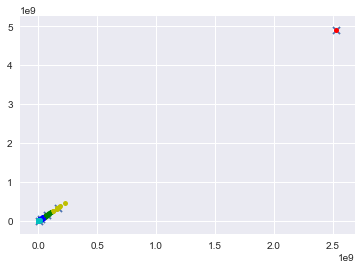

In [142]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(x)
centros = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y.","b."]

for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centros[:, 0],centros[:, 1], marker = "x", s=50, linewidths = 5)

plt.show()



### Cluster de ingressos i despes extret el valor aïllat

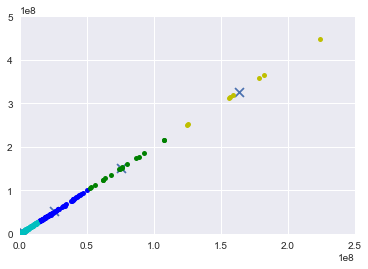

In [143]:
for i in range(len(x)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.axis([0,250000000,0,500000000])  
plt.scatter(centros[:, 0],centros[:, 1], marker = "x", s=80, linewidths = 5)

plt.show()

En el gràfic podem observar com la suma de ingressos i despesses totals per cada ajuntament està equilibrada. No és de extrenyar que hi hagi tanta diferència de import entre uns i els altres, perquè els ajuntaments de les ciutats més grans i amb més habitants acostumen a tenir molts més ingressos i despesses que els que no.

### Cluster Ingressos i Despesses aplicant PCA

In [144]:

xfeatures = StandardScaler().fit_transform(x)
# Keeping 2 components
pca = PCA(n_components=2)
# Explicative variables transformation
principalComponents = pca.fit_transform(xfeatures)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['INGRESSOS','DESPESES'])



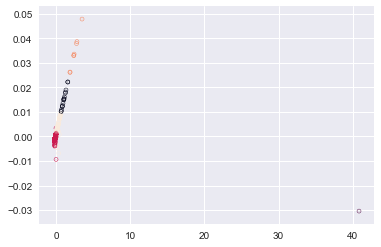

In [145]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(principalDf)
fig, ax = plt.subplots(1,1)
ax.scatter(principalDf['INGRESSOS'],principalDf['DESPESES'], s=0.25, c=kmeans.labels_,linewidth=4)

In [146]:
features2 =['MATERIAL','SERVEIS']
# Separar les variables explicatives
x2 = material_serveis.loc[:, features2].values



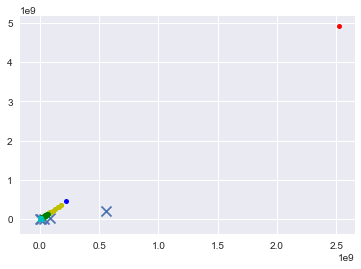

In [147]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(x2)
centros2 = kmeans.cluster_centers_
labels = kmeans.labels_
colors = ["g.","r.","c.","y.","b.","w.","m.","k."]

for i in range(len(x2)):
    plt.plot(x[i][0], x[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centros2[:, 0],centros2[:, 1], marker = "x", s=100, linewidths = 5)
plt.show()


El resultat obtingut és molt semblant al anterior ja que per cada ingrés o despesa els ajuntaments de les ciutats més grans i importants acostumen a tenir més ingressos i despeses